# COGS 118A - Final Project

# Traffic Sign Recognition: CNN vs RNN

## Group members

- Alexander Huynh
- Yimin Lu
- Jenny Vu
- Dong Pham

# Abstract 

The goal for this project is to come up with an image classification model for road signs to aid computer vision style of self driving or computer vision aided driving. We will be using a data set from Kaggle that will have road signs from Germany with about 180 class labels that will be used as a training set. The training set will have about 100K images and testing will have about 50K images. We will be testing the effectiveness and performance of 3 different sizes of Convolutional Neural Networks (CNNs). We will implement these models and then will compare them by using cross validation techniques that were taught in class. We want our models to classify different road signs and will select the model with the best accuracy on a testing set. Accuracy testing will be done by comparing the metadata file that was given.

After implementation, we find the accuracies of the models by fitting the data and using RandomizedSearchCV to get scores. To find the best model for image classification of road signs, we compare the best accuracies output by randomized search CV. In comparing these models, we find that the original LeNet-5 CNN model is still the most accurate for roadsign recognition aiding in self driving cars than the hypertuned CNN model.

# Background


   Traffic sign classification is an important feature of the self-driving car control pipeline. First, the image taken from the camera mounted on the self-driving car requires traffic sign detection, since there may be multiple or no signs within the picture, and state-of-the-art object detection deep neural networks are deployed for this task such as Faster R-CNN, R-FCN, SSD, and YOLO V2.</a>[<sup>[1]</sup>](#arcosnote)

   After object detection has found and cropped out street signs from the original image from the self-driving car's camera, the cropped street sign images now require traffic sign classification to understand whether or not each street sign seen is a stop sign, a yield sign, etc. Which is very important information the self-driving car needs in order to obey traffic rules and keep its passengers safe.</a>[<sup>[2]</sup>](#kakarlanote) The state-of-the-art networks that process this task are Resnet V1 50, Resnet V1 101, Inception V2, Inception Resnet V2, Mobilenet V1, and Darknet-19.</a>[<sup>[1]</sup>](#arcosnote)
   
   The state-of-the art models mostly use Residual Networks (ResNets), which are a type of Convolutional Neural Network (CNN) that has adds \"identity shortcut connections\" in order to overcome the vanishing gradient problem which occurs when a network has too many layers.</a>[<sup>[3]</sup>](#kakarlanote)

# Problem Statement
Self driving cars are the future of transportation in car centric nations. One of the main problems of self-driving cars is detection and recognition of road signs. There are many shapes and objects that people need to discern when driving and it should not be different for computer vision type of self driving. Computer vision style driving allows self driving cars to know what is around the environment. Roadsigns notifies the driver about the rules of the road and promotes safe driving. There are a lot of things to process while we are driving and we need to be able to discern the noise from the road signs. How these road signs are perceived are impacted by things such as the weather(e.g. fog, snow) and the lighting of the area. It is important for self driving models to discern roadsigns despite the environment so they can follow the rules of the road. Utilizing one of the neural network models, we can sift through the data and return the correct symbol analysis.

# Data

The dataset we will be using is “Traffic Signs (GTSRB plus 162 custom classes)” created by Daniil Deltsov from Kaggle.

https://www.kaggle.com/datasets/daniildeltsov/traffic-signs-gtsrb-plus-162-custom-classes

The dataset contains 150k images(observations) separated into 205 classes of traffic signs. This dataset is built on the German Traffic Sign Recognition Benchmark Image Set which originally had 43 classes. The images of each sign are assigned to some folder labeled between 0-204. Each class contains 5-40 original images of the sign and additional generated images. The original images varied in background, lighting, and size of sign. By running 5 different transformations 7 times on each original image, more variety of how these traffic signs are viewed is added to the dataset. There is a test folder consisting of 50k images taken from the training set. The observations are png files of different sizes and must be preprocessed before being able to be fed into the models of CNN.


***Currently we cannot import the whole data set to datahub and the github, so most of the computation and data handling will be done on local machines***

We will import cells and their output onto this document
The images were looped through and resized to be 32x32. By having the images being 32x32 it allows us to train the model on 100k images without it being computationally expensive. After being resized, an image is then converted into a np.array of the same dimensions and appended to an image array which is named X, our data. For some of the images, it will have arrays containing the 32x32 image pixels and the 3 RGB values for each pixel.



### Extracting images

The dataset is sorted on a local machine using a local directory. We will need to import the dataset in a way that the environment will be able to handle it.

In [ ]:
images = []
labels = []
for i in range(classes):
    path = os.path.join(current_path, 'Data_images', 'train', str(i))
    img_folder = os.listdir(path)
    for j in img_folder:
       try:
           image = cv.imread(str(path+'/'+j))
           image = cv.resize(image, (32, 32))
           image = np.array(image)
           images.append(image)
           label = np.zeros(classes)
           label[i] = 1.0
           labels.append(label)
       except:
           pass
   

We will have two data arrays that will store the images and the labels. This code will run and parse through the files and add values to the corresponding tables. 

In [ ]:
images = np.array(images)
images = images / 255
labels = np.array(labels)
X = images.astype(np.float32)
y = labels.astype(np.float32)

These lines of code will convert the arrays into numpy arrays. The images array has every element divided by 255 so they will work easier as floats and we can run our computer vision library to check on the images. The labels is used to create array y. y contains the one-hot encoded arrays of labels for the 205 classes of roadsigns.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) 

(48713, 32, 32, 3) (48713, 32, 32, 3) (48713, 205) (48713, 205)


The X and y are split into training and testing sets with ~48k data image points each.

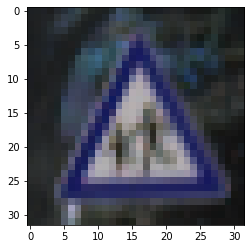

In [ ]:
plt.imshow(X_train[10, :, :, :])

This is just a sample image of one of the data points that will be passed through the neural networks that we are going to train.

# Proposed Solution

For our solution we decided to use a 5 layer CNN model called LeNet-5 to solve our traffic sign classification problem.

We will train this algorithm, and perform a (randomized) hyperparameter search on it. We will see how many epochs each model takes to converge, training accuracy, and validation accuracy after 40 training epochs.

***Note***: that our benchmark model will be a Convolutional Neural Network LeNet-5 </a>[<sup>[4]</sup>](#lenote) which was composed in the 90s by LeCun et al. This is one of the oldest CNN, but it is still accurate and efficient for our task of classifying traffic signs. 

# Evaluation Metrics

Within the CNN models that we will create, we will use Adam optimization, which is a type of Stochastic Gradient Descent (SGD) algorithm that is a combination of RMSprop and Nesterov momentum-based techniques. Adam has consistently shown good performance across different models in many different use cases, and is the most widely used optimizer for machine learning today, not to mention it is the default optimizer for TensorFlow.

The loss function to be optimized will be a logarithmic (probabilistic) loss, cross-entropy loss with softmax. The softmax layer improves performance of our metric by enhancing classes with larger probabilities and diminishing classes with smaller probabilities, which makes the decision of the network more clear. The reason Cross-entropy loss is used is because probabilistic loss makes it so that when error is high, the gradient is very steep, and will drive the network speedily to a less erroneous solution faster. This metric is designed to improve both training time and performance of the network.

When we evaluate the performance of the model on the test set, and spell out results, we will use percentage error since that is the most straightforward way for humans to interpret and judge the performance of the network.

For road signs, it is essential that the road sign is correctly identified and understood. Each set of models and their respective metrics give a result is an indicator of how well the models are able to categorize some image to a category. Cross-entropy loss in multi-classification indicates how close the predicted values are to the true value. Percentage error gives an overall on how often the model correctly classifies an image.

# Results

We will be employing a Kaggle data collection as a training set, which will include road signs from Germany with about 180 class labels.The training set will have around 100K photos, whereas the testing set will contain approximately 50K images.Three different sizes of Convolutional Neural Networks (CNNs) with and without Residual Connections will be tested for efficacy and performance. We trained a Convolutional Neural Network called LeNet. LeNet was used to classify the traffic signs that were included in the dataset. With the base model done, we ran hyperparameters tuning on four specified hyperparameters and executed a random hyperparameter search on the model. 



### LeNet-5 Benchmark 

Our benchmark CNN model is the LeNet-5 made by LeCun *et al* [<sup>[4]</sup>](#lenote). In the paper it was made to classify distinct hand-written digits in the MINST dataset. It is one of the classical CNN and it would be the benchmark model for comparing a hyper-tuned version of it and a residual neural network.

In [ ]:
def LeNet(drop_1 = 0.25, drop_2 = 0.25, drop_3 = .5 , k_size1 = (5,5), k_size2 = (3,3)):
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=k_size1, activation='relu', input_shape=X_train.shape[1:])) 
    model.add(Conv2D(filters=32, kernel_size=k_size1, activation='relu')) 
    model.add(MaxPool2D(pool_size=(2,2))) 
    model.add(Dropout(rate=drop_1)) 
    model.add(Conv2D(filters=64, kernel_size=k_size2, activation='relu')) 
    model.add(Conv2D(filters=64, kernel_size=k_size2, activation='relu')) 
    model.add(MaxPool2D(pool_size=(2,2))) 
    model.add(Dropout(rate=drop_2)) 
    model.add(Flatten()) 
    model.add(Dense(256, activation='relu')) 
    model.add(Dropout(rate=drop_3))
    model.add(Dense(classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
    return model

For our base model we decided on the LeNet neural network. We set the batch size to be 128 and the epoch to 40. The larger batch allowed us to increase the speed of the runtime of the process. By deploying only the 5x5 convolution filters we were able to get a 97.45% on the validation accuracy and a 95.55% on the training accuracy. With this newfound information we decided to tune these four specific hyperparameters. The batch size, dropout, filter size, and the epoch. Lastly, as mentioned above, we went with a five fold cross validation. 

In [ ]:
test = LeNet()
test_plot = test.fit(X_train, y_train, batch_size= 128, epochs= 40, validation_data=(X_test,y_test))

Epoch 1/40
381/381 [==============================] - 4s 9ms/step - loss: 3.3726 - accuracy: 0.2573 - val_loss: 1.3799 - val_accuracy: 0.6247
Epoch 2/40
381/381 [==============================] - 3s 8ms/step - loss: 1.4154 - accuracy: 0.6145 - val_loss: 0.6439 - val_accuracy: 0.8209
Epoch 3/40
381/381 [==============================] - 3s 8ms/step - loss: 0.9315 - accuracy: 0.7353 - val_loss: 0.4429 - val_accuracy: 0.8799
Epoch 4/40
381/381 [==============================] - 3s 8ms/step - loss: 0.7102 - accuracy: 0.7956 - val_loss: 0.3489 - val_accuracy: 0.9084
Epoch 5/40
381/381 [==============================] - 3s 7ms/step - loss: 0.5948 - accuracy: 0.8270 - val_loss: 0.2993 - val_accuracy: 0.9167
Epoch 6/40
381/381 [==============================] - 3s 8ms/step - loss: 0.5084 - accuracy: 0.8487 - val_loss: 0.2571 - val_accuracy: 0.9287
Epoch 7/40
381/381 [==============================] - 3s 8ms/step - loss: 0.4544 - accuracy: 0.8642 - val_loss: 0.2187 - val_accuracy: 0.9416
Epoch 

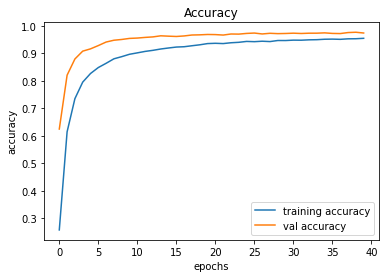

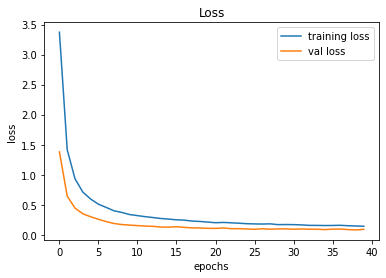

In [ ]:
plt.figure(0)
plt.plot(test_plot.history['accuracy'], label='training accuracy')
plt.plot(test_plot.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(test_plot.history['loss'], label='training loss')
plt.plot(test_plot.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In the graphs we can see as the model is going through more epochs the training and validation are imporoving. We can also see a convergence of the accuracies in the later stages. We see that the loss is getting smaller and converging.

### Lenet Hyperparameter Tuning

Now we have seen the benchmark model in action, we will now try hyper parameter tunning to see if we can fine tune the model for better accuracy.

In [ ]:
batches = [32,64,128]
dropout = [0.2, 0.25, 0.5, 0.1] 
filtersize_1 = [(5,5), (7,7), (9,9)]
filtersize_2 = [(3,3), (2,2), (1,1)]
search_space = dict(batch_size = batches, drop_1 = dropout, drop_2 = dropout, drop_3 = dropout, k_size1 = filtersize_1, k_size2 = filtersize_2)

These will be the hyperparameters that we are going to tune our LeNet Neural network: 
- Batches is the batch size of the data, it is the amount data points in a single partition that is going to be passed through our Neural Network, the higher the value the faster it runs. 
- Dropout is the dropout rate of the data, it is primarily used to compensate for overfitting, we are going to use 3 dropout rates for hypertuning. 
- Filter size is the size of our filter for the neural network, in this case we have to run a smaller filter on the latter half of our NN. 
- Epoch is the number of times we are going to train our neural network. It will always tune in hyperparameter tuning, but 40 epochs would be a solid number.

As stated above we decided to tune these four specific hyperparameters: batch size, drop out rate, filter size and epoch. While smaller batch sizes generally give a better result, we did not want to suffer the consequence of a high computation cost. Therefore, we choose these three batch sizes to run with, 32, 64 and 128. The dropout rate allows for better accuracy because it can help with overfitting. For this hyperparameter we chose: 0.2,0.25,0.5, and 0.1. The convolution filters we chose were 5x5, 7x7 and 9x9. Lastly, we decided it was best to leave the epoch size to 40. This is because any larger size would greatly increase the runtime and computation load. 

In [ ]:
clf_keras = KerasClassifier(build_fn = LeNet, epochs = 40, verbose = 0)

We will wrap our tensorflow function into a Scikit learn wrapper in order to do our cross validation and randomized search.

In [ ]:
rand = RandomizedSearchCV(estimator=clf_keras, param_distributions=search_space, verbose= 3, cv = 5)

This cross validation will be a randomized search CV, since it will take a lot of computation and time to perform a grid search on the every possible combination of hyperparameters that we have in our dictionary. Utilizing randomized search CV as the cross validation, will allow us to perform a search on all the hyperparameter combinations to find the best ones while still remaining efficient. With five cross validation folds and ten candidates, we will end with fifty runs for our cross validation. 

In [ ]:
rand.fit(X_train,y_train)

After tuning the fitting of our randomized search, we came up with the best score below.

In [ ]:
rand.best_score_

0.9691457509994507

These are the parameters that resulted in the best score:

In [ ]:
params = rand.best_params_
params

{'k_size2': (2, 2),
 'k_size1': (5, 5),
 'drop_3': 0.25,
 'drop_2': 0.2,
 'drop_1': 0.1,
 'batch_size': 128}

This will be our hyperparameter tuned CNN model. Some parameters are the same like the 2nd dropout rate the first filtersize. We have a smaller begining dropout rate and have a smaller size 2nd filter.

In [ ]:
hyper = LeNet(drop_1= 0.1, drop_2= 0.2, drop_3 = 0.25, k_size1= (5,5), k_size2=(2,2))
hyper_plot = hyper.fit(X_train, y_train, batch_size= 128, epochs= 40, validation_data=(X_test,y_test))

Epoch 1/40
381/381 [==============================] - 11s 10ms/step - loss: 2.9622 - accuracy: 0.3246 - val_loss: 1.1237 - val_accuracy: 0.7007
Epoch 2/40
381/381 [==============================] - 3s 9ms/step - loss: 1.0509 - accuracy: 0.7052 - val_loss: 0.5823 - val_accuracy: 0.8416
Epoch 3/40
381/381 [==============================] - 4s 11ms/step - loss: 0.6529 - accuracy: 0.8120 - val_loss: 0.3843 - val_accuracy: 0.8970
Epoch 4/40
381/381 [==============================] - 4s 10ms/step - loss: 0.4629 - accuracy: 0.8616 - val_loss: 0.2958 - val_accuracy: 0.9198
Epoch 5/40
381/381 [==============================] - 4s 10ms/step - loss: 0.3718 - accuracy: 0.8868 - val_loss: 0.2529 - val_accuracy: 0.9302
Epoch 6/40
381/381 [==============================] - 4s 10ms/step - loss: 0.3143 - accuracy: 0.9039 - val_loss: 0.2115 - val_accuracy: 0.9419
Epoch 7/40
381/381 [==============================] - 4s 11ms/step - loss: 0.2684 - accuracy: 0.9173 - val_loss: 0.2025 - val_accuracy: 0.9425

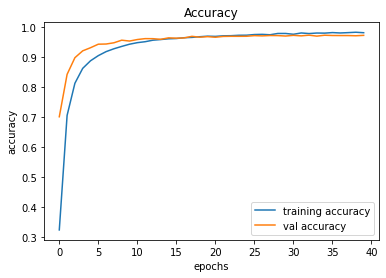

In [ ]:
plt.plot(hyper_plot.history['accuracy'], label='training accuracy')
plt.plot(hyper_plot.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

From the graph and the verbose of fitting the data into our model, it looks like our hyperparameter tuned model is overfitting to the training data. We can see the intersect of the two accuracy values within our graph. Our training accuracy is higher then the validation acuracy. It is still an accurate model none the less, with a 97.13% validation accuracy. We can try implementing our model with less epochs in order to combat the overfitting of training data.

Compared to the base model our hyperparameter tuned model, the hyper-tuned model overfitted with the training data set. The validation accuracy of the base model is 97.745% with a training accuracy of 95.55%, while the hyper tuned model has a validation accuracy of 97.1% with a 98% training accuracy. Overall the base LeNet-5 model would be the best performer out of the two models. We could have done a grid search, to find the best true hyperparameters, but that would be computationally expensive.

Having the the model that is overfitted to the training data is still normal. We will still use the hyper-parameters that we have came up. Since, the hyper-tuned model has a decent validation accuracy.

### LeNet-5 Architecture

![alt text](letNetgraph.png "Our ResNet")

# Discussion

### Interpreting the result
After runing 40 epochs these are the accuracies for each model.

Benchmark model
- Validation accuracy : 97.45
- training accuracy : 95.52

Tuned model
- Validation accuracy: 97.13
- Training accuracy: 98.00

Both the Benchmark and Tuned model perform fairly well on the data. They both were close to convergence at 40 epochs of training with the final accuracies above. We did not run into much training instability or problems, likely due to the fact that we used the Adam optimizer, which allows for smooth and fast convergence, and the data was not too hard for the model to understand.

It is notably interesting that the validation accuracies were much higher than the training accuracy at many points in the tuned and untuned model. This is due to the Dropout layers added to the models. Dropout layers will randomly set k% of weights to 0, thus helping to prevent overfitting of the data. Dropout layers affect performance during training time, but are not activated during test/validation time, which is why the performance during training time is lower than validation time.

The hyperparamater-tuned model also did not exhibit better validation accuracy compared to the benchmark model. This might have been different if we had more computational resources (expanded on in Limitations section). But the hyperparameter-tuned model notably improved the training accuracy, due to setting the dropout rates lower for each dropout layer. This setting did not make the model perform that much worse, and the model still generalized to the validation data almost just as well.

### Limitations

One of the limitations that we had was time. Mainly, we could've done grid search for the best hyperparameters rather than using a randomized search and cross-validation. Sometimes randomized search would lead to hyperparameters that are not the best scenario and accuracy. In our case for CNN, it led the model to overfit with the training data and have a smaller validation accuracy. We would also want to explore different epochs and hyperparameters for each model to see if there is a change in validation accuracy and the time it takes to fit the data with the model.

Another that was considered was that the data was already transformed or modified, not showing the original image. We had to transform the data even more by compressing them to make them easier to read from the model's perspective. Compressing images can make small important details invisible in the computer vision world. We want a model that would take the full definition of the image and use that for training.

Another limitation is that the dataset was too big (16 GBs) and we had to store the data set into our local machines. We think that our local machines do not have the computing power compared to the Datahub clusters and can be a reason why it takes a long time to fit the data within our models. Using local machines did not only make our training times longer, but it also limited the access the data to specific group mates. Next time, we would want to have pickle files of our dataset or work with a smaller version of the dataset so it could be easily accessed by everyone, and can also be used on the Datahub clusters. 

### Ethics & Privacy

Traffic signs are designed to communicate traffic laws and regulate the flow of vehicles using the roads. This prevents accidents and ensures the safety of many drivers. The dataset of images, itself, doesn't pose any privacy risk, but may fail to train algorithms to correctly identify a sign for every instance. Training data available may not be representative of all environmental conditions signs can appear in. Additionally, the signs on which algorithms are trained on, may become outdated resulting in the model failing to identify traffic signs.

In application to the real world situations, image classification of traffic signs will most likely be utilized for autonomous vehicles or address some need of understanding traffic. Given the purpose of traffic signs, it has the potential to put lives in harm's way.

In order to address issues of safety and traffic sign changes, the regulating administration of transportation would have to have some tests to ensure the algorithms and vehicles meet an acceptable standard to be publicly used. These checks must occur at set frequencies to ensure everything is up to date. There must be clear communication on changes in signs or traffic laws to companies utilizing traffic sign identification in order for it to be safely used.

### Conclusion

Both models are are pretty accurate with more than 90% chance of classfication of traffic signs, there is still about a 5 percent error rate from the best model. Therefore we would not want to have these models be classifying traffic signs in the real world yet, as human lives are in jeopardy when dealing with self-driving car software. For real-world applications, the accuracies must be as close to 100% as possible to be safe. However, for such a small and lightweight model with 5 layers, the performance is suprisingly good, since there are 205 classes to classify from a image.

# Footnotes
<a name="arcosnote"></a>1.[^](#arcosnote): Evaluation of deep neural networks for traffic sign detection systems. *Neurocomputing 2018*. https://paperswithcode.com/paper/evaluation-of-deep-neural-networks-for<br> 
<a name="kakarlanote"></a>2.[^](#kakarlanote): Traffic Sign Classification using Residual Networks(ResNet). *Syam Kakarla*. https://towardsdatascience.com/traffic-sign-classification-using-residual-networks-resnet-4b550046ff83<br>
<a name="pytorchnote"></a>3.[^](#pytorchnote): How Does PyTorch Support ResNet?. *run.ai*. https://www.run.ai/guides/deep-learning-for-computer-vision/pytorch-resnet#ResNet-Architecture<br>
<a name= "lenote"></a>4.[^](#lenote): Gradient-Base Learning applied to Document Recognition. *Yann LeCun et. al*. http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf